# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):

  print(f"Scraping page {i}")

  url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

  response = requests.get(url)

  content = response.content
  parsed_content = BeautifulSoup(content, 'html.parser')
  for para in parsed_content.find_all("div", {"class": "text_content"}):
    reviews.append(para.get_text())

  print(f"   ---> {len(reviews)} total reviews")


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | I wanted to write this review s...
1,✅ Trip Verified | Check in fast and friendly....
2,✅ Trip Verified | This is the first time I ha...
3,✅ Trip Verified | Flew business class from Do...
4,✅ Trip Verified | Starting off at Heathrow Te...


In [ ]:
df

,reviews
0,Not Verified | I wanted to write this review s...
1,✅ Trip Verified | Check in fast and friendly....
2,✅ Trip Verified | This is the first time I ha...
3,✅ Trip Verified | Flew business class from Do...
4,✅ Trip Verified | Starting off at Heathrow Te...
...,...
995,✅ Trip Verified | London to Doha. Similar to ...
996,✅ Trip Verified | London Heathrow to Houston....
997,Not Verified | Larnaca to London. This A320 i...
998,✅ Trip Verified | I booked my BA flight from ...


In [ ]:
df.reviews = df.reviews.str.split('|', expand=True)[1]

In [ ]:
df

,reviews
0,I wanted to write this review so I could give...
1,Check in fast and friendly. Security a breez...
2,This is the first time I have seen the new C...
3,Flew business class from Doha to London on 3...
4,Starting off at Heathrow Terminal 3. Check i...
...,...
995,London to Doha. Similar to our outbound flig...
996,London Heathrow to Houston. Despite sitting ...
997,Larnaca to London. This A320 is totally unsu...
998,I booked my BA flight from Zurich to London ...


# **Step 1: Cleaning**

In [ ]:
import re

# Define a function to clean the text
def clean(text):
  # removing special characters
  text = re.sub('[^A-Za-z]+', ' ', str(text))
  return text

# create a new column with cleaned reviews
df['Cleaned reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned reviews
0,I wanted to write this review so I could give...,I wanted to write this review so I could give...
1,Check in fast and friendly. Security a breez...,Check in fast and friendly Security a breeze ...
2,This is the first time I have seen the new C...,This is the first time I have seen the new Cl...
3,Flew business class from Doha to London on 3...,Flew business class from Doha to London on st...
4,Starting off at Heathrow Terminal 3. Check i...,Starting off at Heathrow Terminal Check in wa...


In [ ]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J': wordnet.ADJ, 'V': wordnet.VERB, 'N': wordnet.NOUN, 'R': wordnet.ADV}
def token_stop_pos(text):
  tags = pos_tag(word_tokenize(text))

  new_list = []
  for word, tag in tags:
    if word.lower() not in set(stopwords.words('english')):
      new_list.append(tuple([word, pos_dict.get(tag[0])]))
  return new_list

df['POS tagged'] = df['Cleaned reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned reviews,POS tagged
0,I wanted to write this review so I could give...,I wanted to write this review so I could give...,"[(wanted, v), (write, v), (review, n), (could,..."
1,Check in fast and friendly. Security a breez...,Check in fast and friendly Security a breeze ...,"[(Check, n), (fast, n), (friendly, a), (Securi..."
2,This is the first time I have seen the new C...,This is the first time I have seen the new Cl...,"[(first, a), (time, n), (seen, v), (new, a), (..."
3,Flew business class from Doha to London on 3...,Flew business class from Doha to London on st...,"[(Flew, n), (business, n), (class, n), (Doha, ..."
4,Starting off at Heathrow Terminal 3. Check i...,Starting off at Heathrow Terminal Check in wa...,"[(Starting, v), (Heathrow, n), (Terminal, n), ..."


In [ ]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned reviews,POS tagged,Lemma
0,I wanted to write this review so I could give...,I wanted to write this review so I could give...,"[(wanted, v), (write, v), (review, n), (could,...",want write review could give huge thank one ...
1,Check in fast and friendly. Security a breez...,Check in fast and friendly Security a breeze ...,"[(Check, n), (fast, n), (friendly, a), (Securi...",Check fast friendly Security breeze Lounge b...
2,This is the first time I have seen the new C...,This is the first time I have seen the new Cl...,"[(first, a), (time, n), (seen, v), (new, a), (...",first time see new Club World suite seat com...
3,Flew business class from Doha to London on 3...,Flew business class from Doha to London on st...,"[(Flew, n), (business, n), (class, n), (Doha, ...",Flew business class Doha London st March ser...
4,Starting off at Heathrow Terminal 3. Check i...,Starting off at Heathrow Terminal Check in wa...,"[(Starting, v), (Heathrow, n), (Terminal, n), ...",Starting Heathrow Terminal Check fairly easy...


In [ ]:
df[['reviews','Lemma']]

,reviews,Lemma
0,I wanted to write this review so I could give...,want write review could give huge thank one ...
1,Check in fast and friendly. Security a breez...,Check fast friendly Security breeze Lounge b...
2,This is the first time I have seen the new C...,first time see new Club World suite seat com...
3,Flew business class from Doha to London on 3...,Flew business class Doha London st March ser...
4,Starting off at Heathrow Terminal 3. Check i...,Starting Heathrow Terminal Check fairly easy...
...,...,...
995,London to Doha. Similar to our outbound flig...,London Doha Similar outbound flight seat com...
996,London Heathrow to Houston. Despite sitting ...,London Heathrow Houston Despite sit back pla...
997,Larnaca to London. This A320 is totally unsu...,Larnaca London totally unsuitable flight len...
998,I booked my BA flight from Zurich to London ...,book BA flight Zurich London Heathrow use Av...


# **Sentiment Analysis using VADER**

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.9 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vsanalysis(review):
  vs = analyzer.polarity_scores(review)
  return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vsanalysis)

# function to analyse
def vader_analysis(compound):
  if compound >= 0.5:
      return 'Positive'
  elif compound < 0:
    return 'Negative'
  else:
    return 'Neutral'

df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned reviews,POS tagged,Lemma,Sentiment,Analysis
0,I wanted to write this review so I could give...,I wanted to write this review so I could give...,"[(wanted, v), (write, v), (review, n), (could,...",want write review could give huge thank one ...,0.9722,Positive
1,Check in fast and friendly. Security a breez...,Check in fast and friendly Security a breeze ...,"[(Check, n), (fast, n), (friendly, a), (Securi...",Check fast friendly Security breeze Lounge b...,0.9717,Positive
2,This is the first time I have seen the new C...,This is the first time I have seen the new Cl...,"[(first, a), (time, n), (seen, v), (new, a), (...",first time see new Club World suite seat com...,0.8020,Positive
3,Flew business class from Doha to London on 3...,Flew business class from Doha to London on st...,"[(Flew, n), (business, n), (class, n), (Doha, ...",Flew business class Doha London st March ser...,0.1779,Neutral
4,Starting off at Heathrow Terminal 3. Check i...,Starting off at Heathrow Terminal Check in wa...,"[(Starting, v), (Heathrow, n), (Terminal, n), ...",Starting Heathrow Terminal Check fairly easy...,0.9969,Positive


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    481
Negative    411
Neutral     108
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7c89640100a0>,
 [Text(0.06562028214553672, 1.0980409730839467, 'Positive'),
  Text(-0.42732873930062687, -1.013602559471777, 'Negative'),
  Text(1.2730372826016982, -0.44930621752440103, 'Neutral')],
 [Text(0.03579288117029275, 0.5989314398639708, '48.1%'),
  Text(-0.23308840325488736, -0.5528741233482419, '41.1%'),
  Text(0.8015419927492173, -0.2828965073301784, '10.8%')])

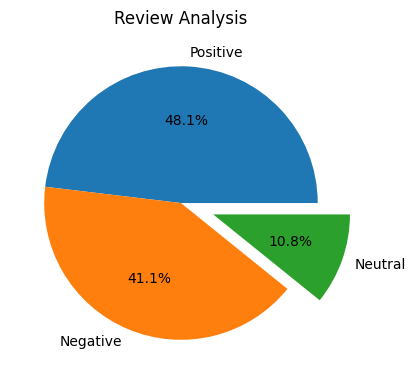

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Review Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)


In [ ]:
df.to_csv("BA_reviews.csv")

# **Wordcloud**
Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

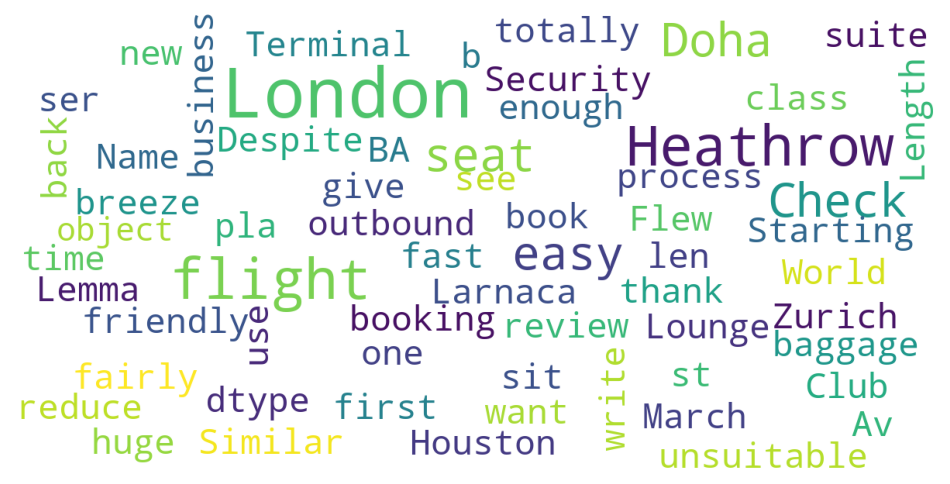

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
  wordcloud = WordCloud(
      background_color='white',
      stopwords=stopwords,
      max_words=100,
      max_font_size=30,
      scale=3,
      random_state=4)

  wordcloud = wordcloud.generate(str(data))

  fig = plt.figure(1, figsize=(12, 12))
  plt.axis('off')
  plt.imshow(wordcloud)
  plt.show()

show_wordcloud(df.Lemma)